<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

# Setup and Context


### Introduction

In this notebook I will be using data collected on Boston Massachusetts in the 1970's on housing to build a model that can provide a price estimate based on a home's charateristics such as:

* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc

In order to accomplish this I will:

1. Analyse and explore the Boston house price data
2. Split  data for training and testing
3. Run a Multivariable Regression
4. Evaluate the model's coefficients and residuals
5. Use data transformation to improve the model performance
6. And finally use the model to estimate the price of a property, given certain charateristics

###  Import Statements


In [50]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [51]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index. 

In [52]:
data = pd.read_csv('boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


# Preliminary Data Exploration 🔎

First we'll explore some basis features of the dataset such as:

* What is the shape of `data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [53]:
data.shape #506 data points

(506, 14)

In [54]:
data.columns #13 different characteristics

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [55]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [7]:
data.count() #number of rows for each column

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

In [8]:
print(f"Are there any NaN values?: {data.isna().values.any()}")

Are there any NaN values?: False


In [9]:
print(f"Are there any duplicated values?: {data.duplicated().values.any()}")

Are there any duplicated values?: False


## Descriptive Statistics

The next step is to take a closer into the data and specifically if we can find any interesting features for the different charateristiscs.



In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


* How many students are there per teacher on average? We can see that the mean `PTRATIO` is 18.46
* What is the average price of a home in the dataset? The average price of a home is $22,530
* What is the `CHAS` feature? The `CHAS` feature indicates whether a property is next to the Charles River or not, this is known as a categorical variable as it can only have a discrete number of values.
* What are the minimum and the maximum value of the `CHAS` and why? 1 is the maximum value indicating that the property is next to the Charles River and 0 indicates otherwise. 
* What is the maximum and the minimum number of rooms per dwelling in the dataset? Max `RM` = 8.78, Min `RM` = 3.56, which can be rounded up to 9 and 4.

We can note that the average price of homes have significantly appreciated since the 1970's owing to inflation and other factors.

## Visualise the Features

Having looked at some descriptive statistics, we can now visualise the data for our model. Using [Seaborn's `.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) to create a bar chart and superimpose the Kernel Density Estimate (KDE) for the following variables: 

* PRICE: The home price in thousands.
* RM: the average number of rooms per owner unit.
* DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.
* RAD: the index of accessibility to highways. 

#### House Prices 💰

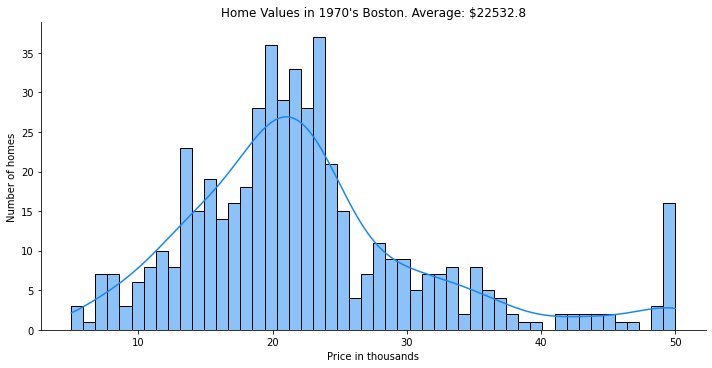

In [11]:
sns.displot(data["PRICE"],
            bins=50,
            aspect=2,
            kde=True,
            color="#1886f3")

plt.title(f"Home Values in 1970's Boston. Average: ${data.PRICE.mean()*1000:.6}");
plt.xlabel("Price in thousands");
plt.ylabel("Number of homes");

The distribution of house prices seems to be what we would expect, with the mean around the 20 mark, however there is an unexpected spike at the $50,000 mark.

#### Distance to Employment - Length of Commute 🚗

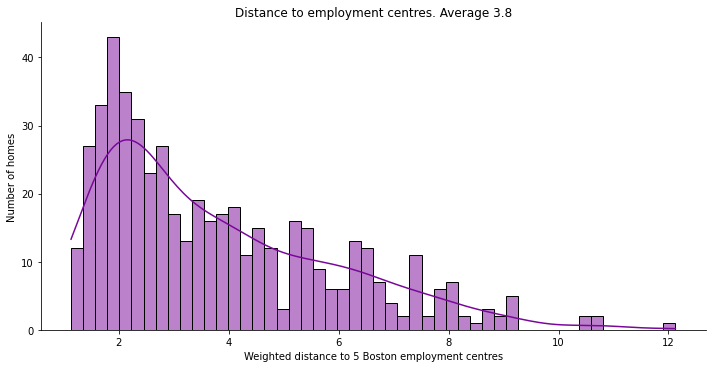

In [12]:
sns.displot(data.DIS,
            aspect=2,
            bins=50,
            kde=True,
            color="#790799")

plt.title(f"Distance to employment centres. Average {data.DIS.mean():.2}");
plt.xlabel("Weighted distance to 5 Boston employment centres");
plt.ylabel("Number of homes");

Most homes are located on average 3.8 miles away from work, with the number of homes gradually decreasing as we go beyond this distance.

#### Number of Rooms

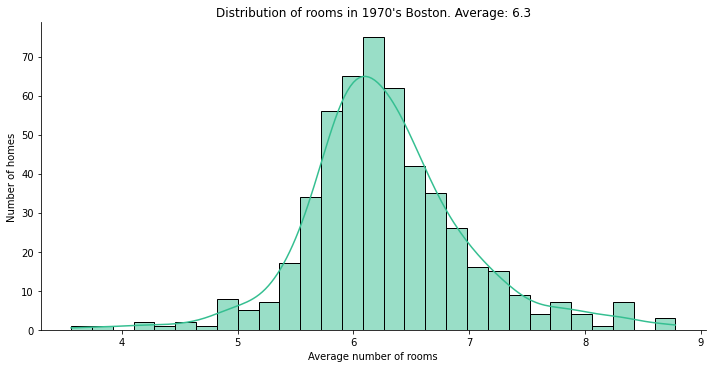

In [56]:
sns.displot(data.RM,
            aspect=2,
            kde=True,
            color="#35bf91"
            )

plt.title(f"Distribution of rooms in 1970's Boston. Average: {data.RM.mean():.2}");
plt.xlabel("Average number of rooms");
plt.ylabel("Number of homes");

#### Access to Highways 🛣

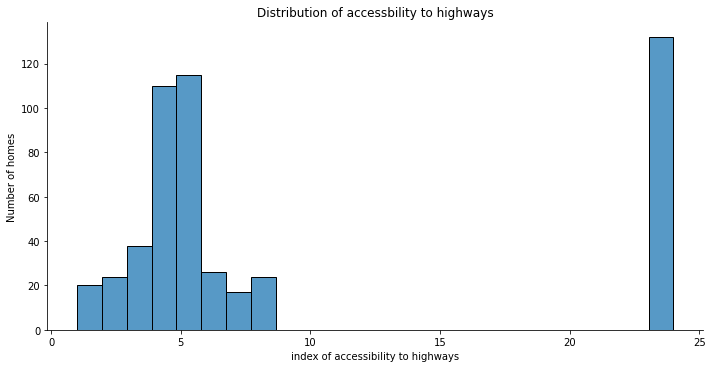

In [14]:
sns.displot(data.RAD,
            aspect=2,
            bins=24,
            )

plt.title("Distribution of accessbility to highways");
plt.xlabel("index of accessibility to highways");
plt.ylabel("Number of homes");

RAD is an index of accessibility to highways, a larger value represents better access to a highway, we can see a big gap in the values of the index.

#### Next to the River? ⛵️


We can create a bar chart with plotly for `CHAS` to show many more homes are away from the river versus next to it. 



In [15]:
river_access = data.value_counts("CHAS")
river_access

CHAS
0.00    471
1.00     35
dtype: int64

In [16]:
bar = px.bar(x=["No", "Yes"],
        y=river_access.values,
        color=river_access.values,
        color_continuous_scale=px.colors.sequential.haline,
        title="Next to Charles River?")

bar.update_layout(xaxis_title="Property located next to the river?",
                  yaxis_title="Number of homes",
                  coloraxis_showscale=False)


bar.show()

The majority of homes are not located next to the Charles River, only 35 are located next to the river out of a total of 506 homes.

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understand the Relationships in the Data

### Pair Plot

There might be some relationships in the data that we should know about. Such as:

* What would the expected relationship be between pollution (NOX) and the distance to employment (DIS)? 
* What kind of relationship would we expect between the number of rooms (RM) and the home value (PRICE)?
* What about the amount of poverty in an area (LSTAT) and home prices? 

We can run a [Seaborn `.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) to visualise all the relationships at the same time. 

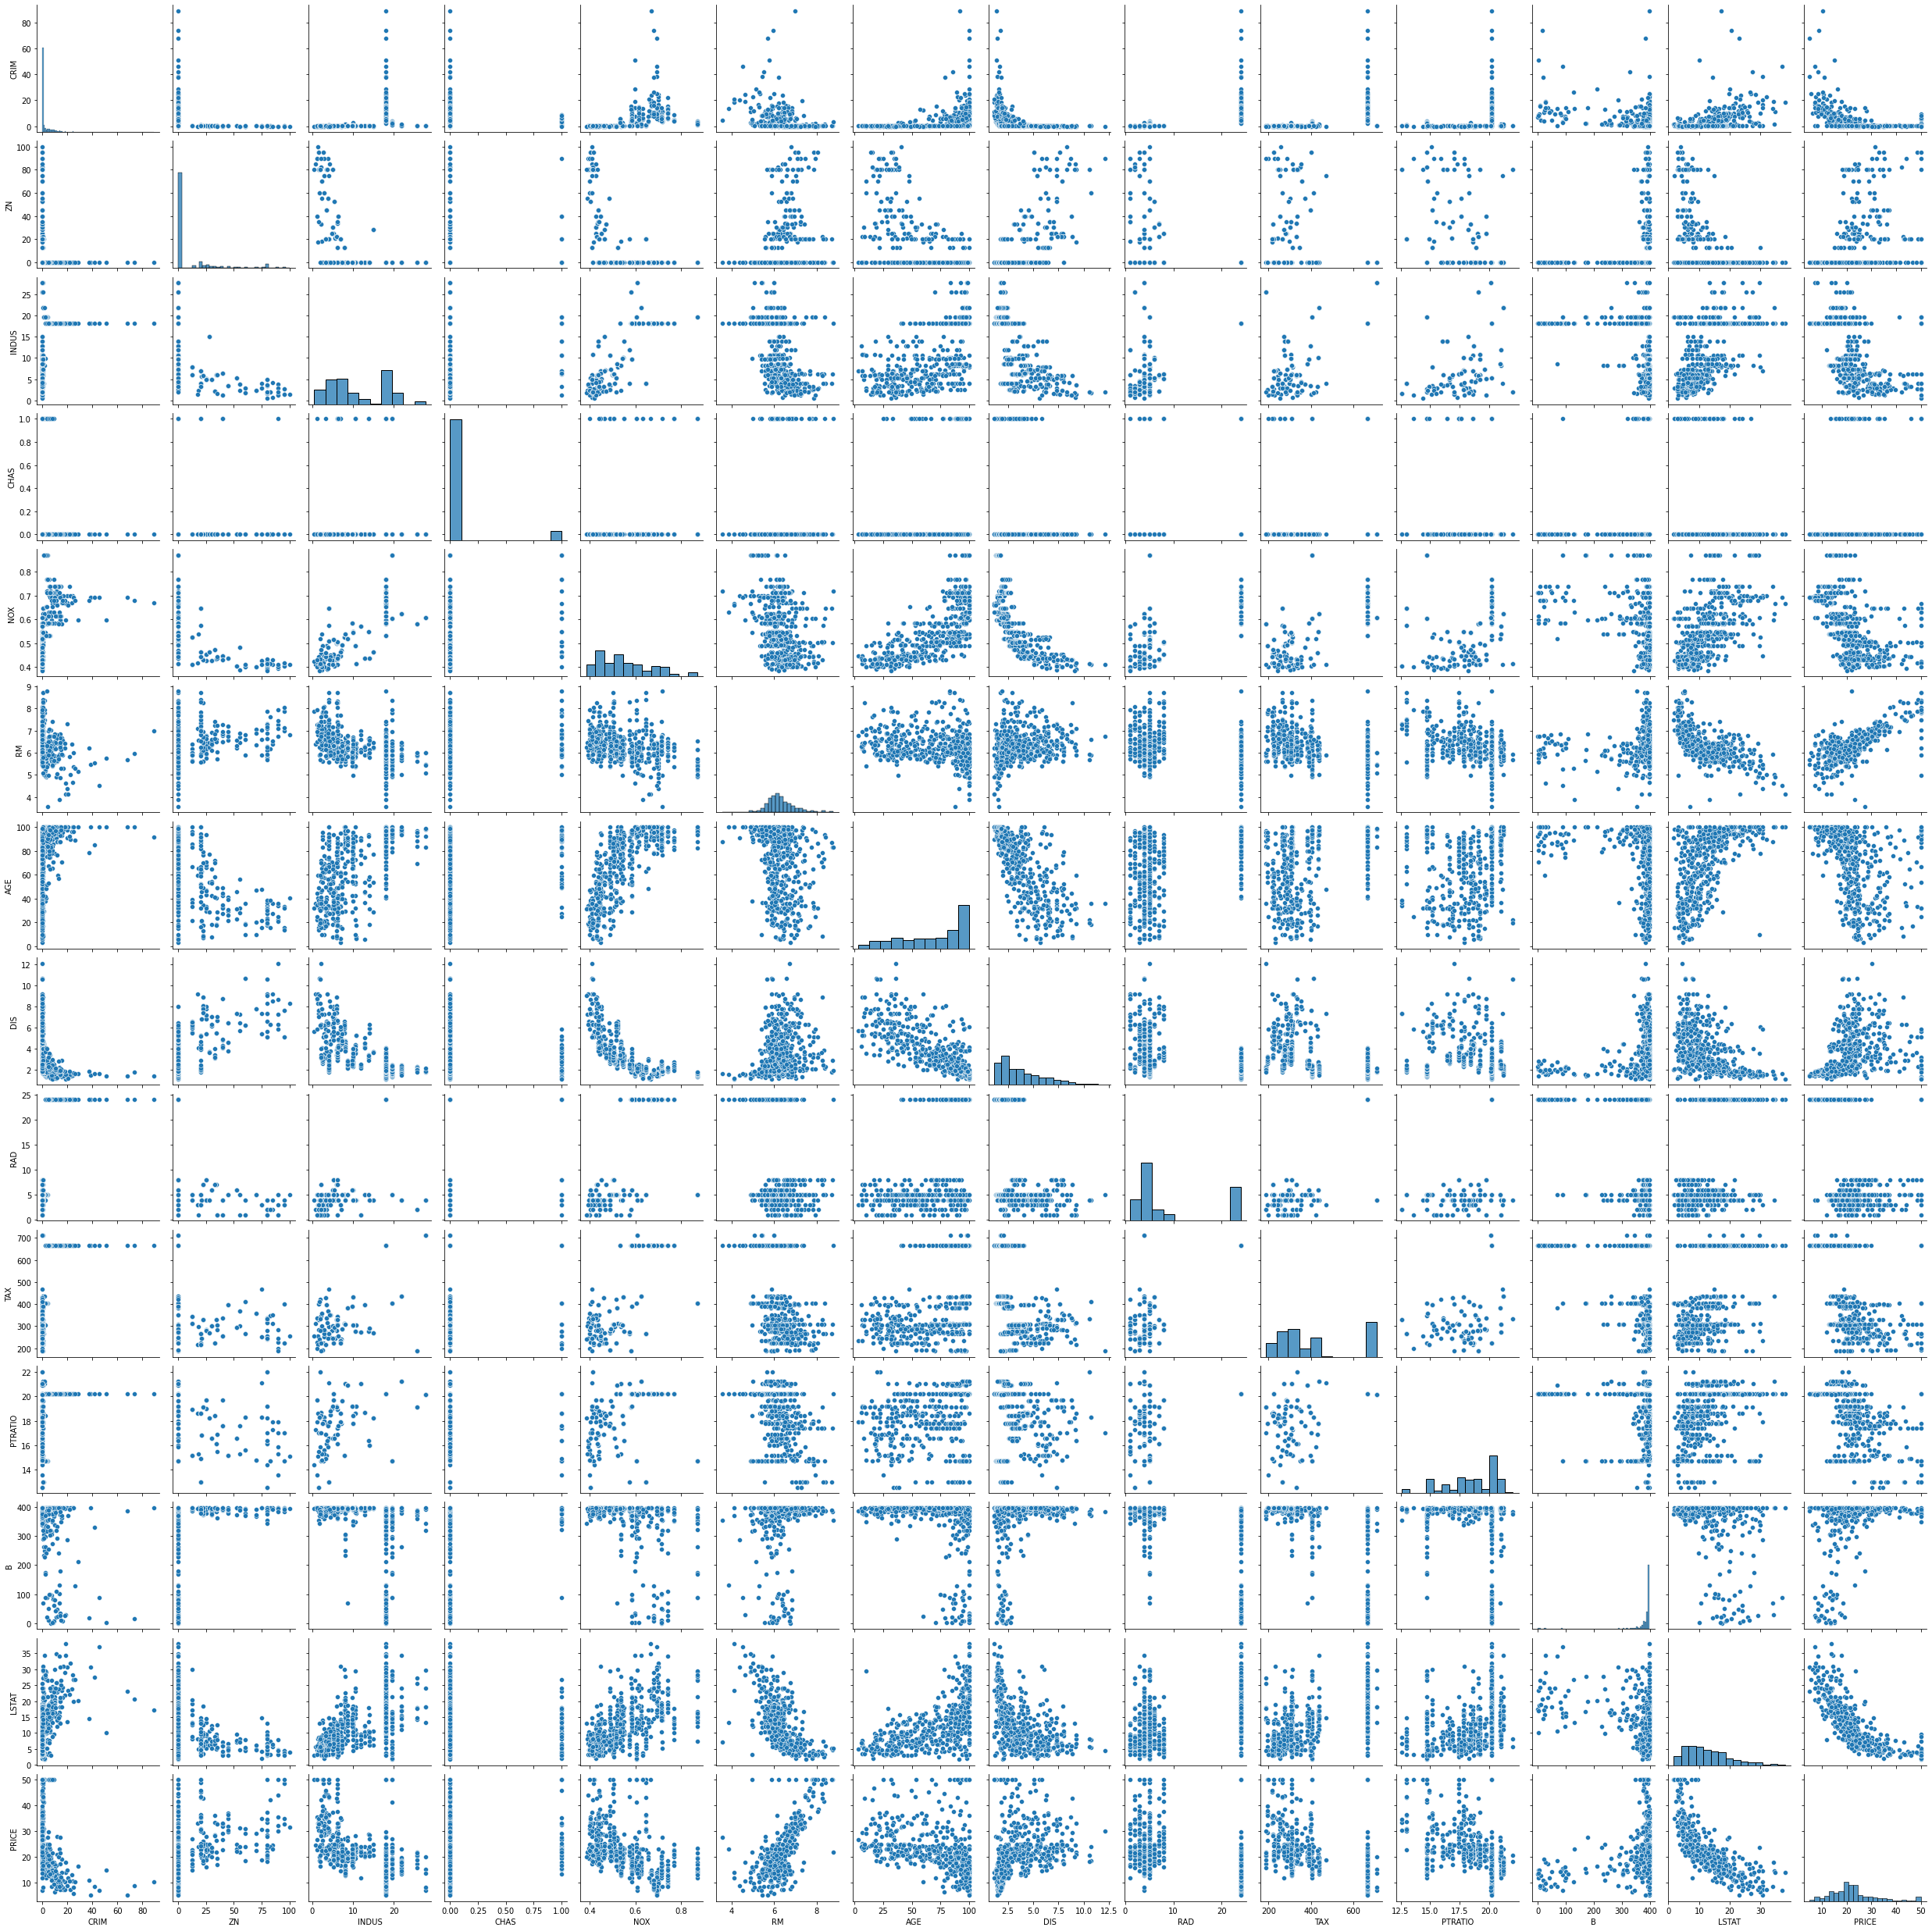

In [71]:
sns.pairplot(data)

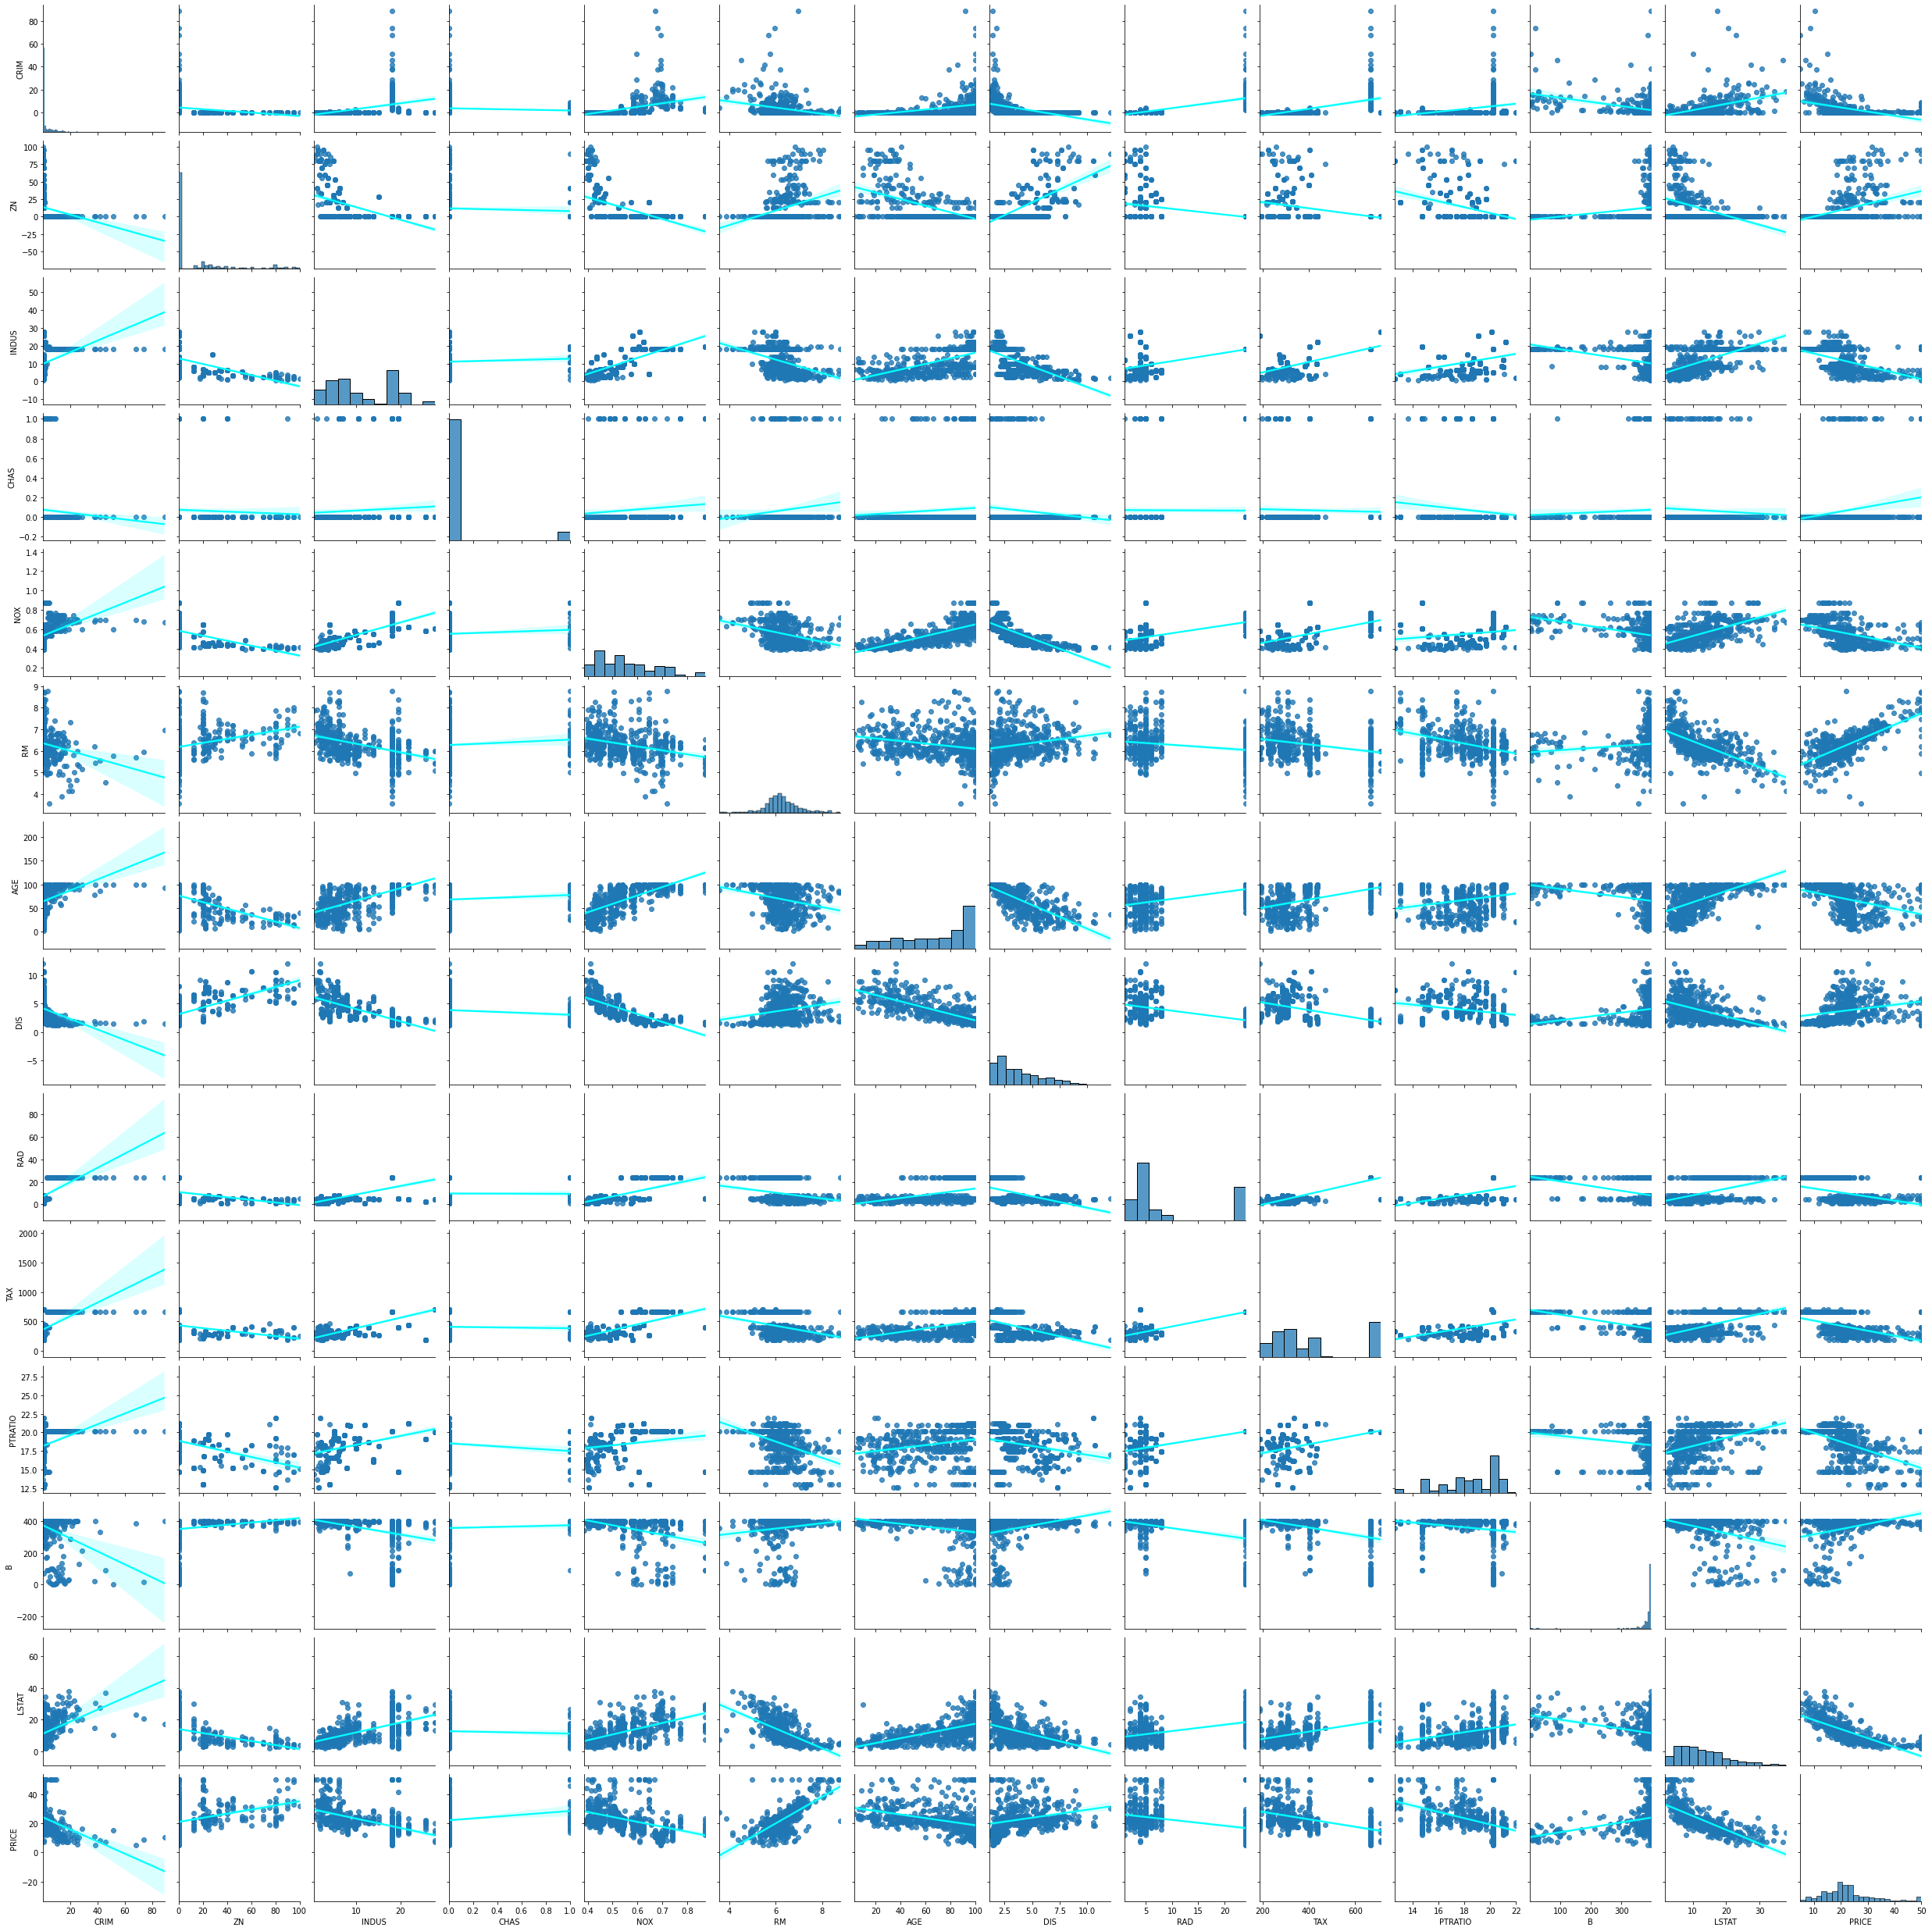

In [72]:
# We can even include a regression line
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

We get back a grid with scatter plots displaying the relationships between all the columns in the dataset and histograms down the diagonal in the middle for all the columns. But its difficult to view any interesting charateristics that might be occuring.



We can use [Seaborn's `.jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to look at some of the relationships in more detail:

* DIS and NOX
* INDUS vs NOX
* LSTAT vs RM
* LSTAT vs PRICE
* RM vs PRICE


#### Distance from Employment vs. Pollution


We will compare DIS (Distance from employment) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`.  Does pollution go up or down as the distance increases? 

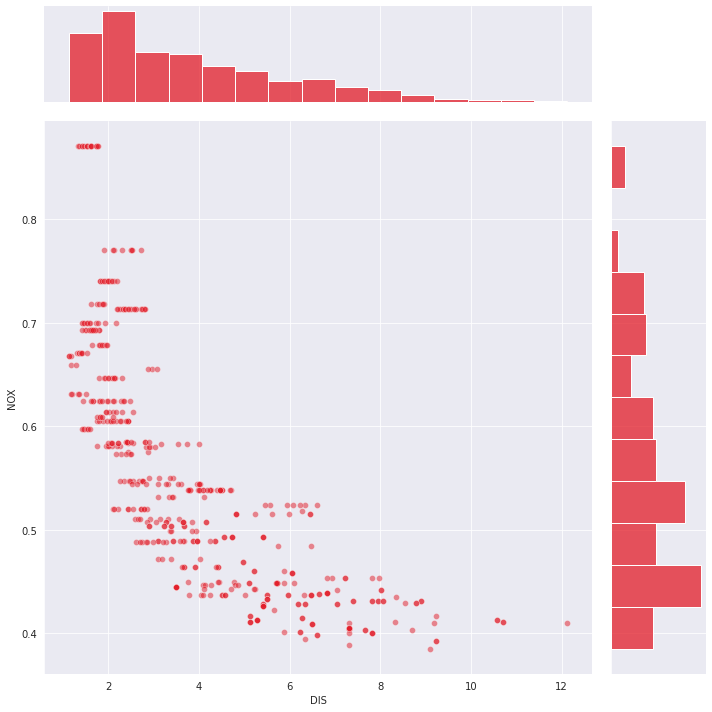

In [19]:
with sns.axes_style("darkgrid"):
  sns.jointplot(data=data, 
                x="DIS",
                y="NOX",
                kind="scatter",
                joint_kws={"alpha":0.5},
                height=10,
                color="#e21c28")

The relationship between these two features is as expected, going further out of town the the levels of Nitric Oxide start to fall. However, at a distance of 2 miles we see varying levels of NOX. Futhermore, between the 9 and 12 mile range we can similarly see that the NOX levels are very similar. 

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution 

We can compare INDUS (the proportion of non-retail industry i.e., factories) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`. Does pollution go up or down as there is a higher proportion of industry?

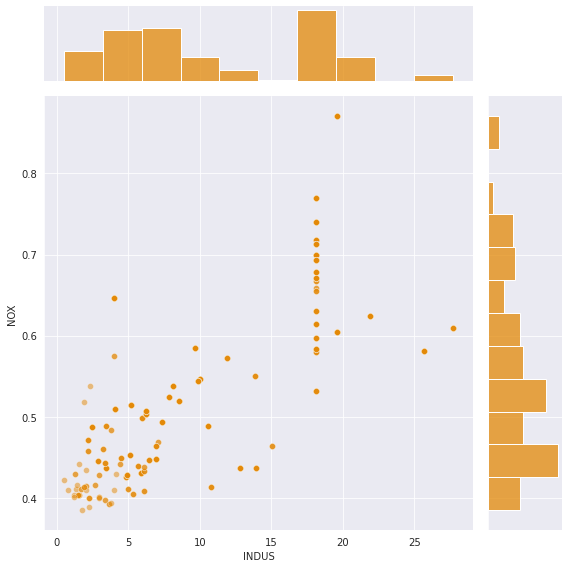

In [20]:
with sns.axes_style("darkgrid"):
  sns.jointplot(data=data,
                x="INDUS",
                y="NOX",
                color="#e38908",
                height=8,
                joint_kws={"alpha":0.5})

The relationship here is not as clear as we intuitively might have guessed. Mainly due to the fact that the same proportion of non retail industry correspond to a large range in NOX levels. The trend of increasing NOX with INDUS is clear up until the 10 INDUS mark, with some anomalies also occuring before this point.

#### % of Lower Income Population vs Average Number of Rooms

We can compare LSTAT (proportion of lower-income population) with RM (number of rooms) using Seaborn's `.jointplot()`. How does the number of rooms per dwelling vary with the poverty of area? Do homes have more or fewer rooms when LSTAT is low?

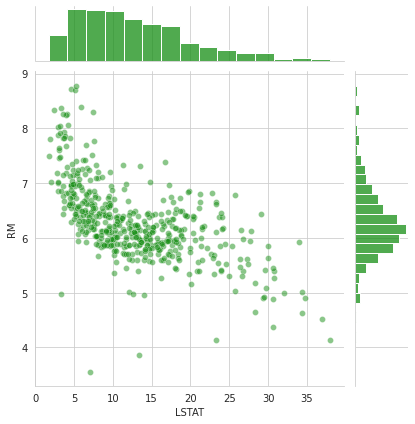

In [21]:
with sns.axes_style("whitegrid"):
  sns.jointplot(data=data,
                x="LSTAT",
                y="RM",
                color="#168e14",
                joint_kws={"alpha":0.5})

The majority of homes with 8 rooms or more tend to cluster in the top left corner, where the LSTAT is less than 10%. As the LSTAT gradually increases, the inverse occurs for the number of rooms, this trend seems to level out at 10% and the RM is generally similar for the 10-20% LSTAT range, beyond this point further declines in LSTAT result in RM to fall too.  

#### % of Lower Income Population versus Home Price


We can compare LSTAT with PRICE using Seaborn's `.jointplot()`. How does the proportion of the lower-income population in an area affect home prices?

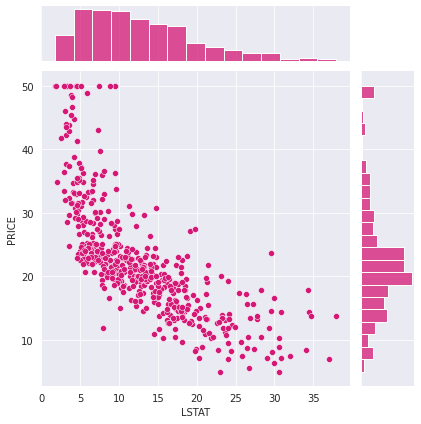

In [22]:
with sns.axes_style("darkgrid"):
  sns.jointplot(data=data,
                x="LSTAT",
                y="PRICE",
                color="#d51876")

Evidently as the proportion of lower income population in an area increases, the prices tend to fall, however the house prices at 50k mark are spread out between the 0-10% LSTAT range.

#### Number of Rooms versus Home Value

We can compare `RM` (number of rooms) with `PRICE` using Seaborn's `.jointplot()`. We can probably guess how the number of rooms affects home prices. 

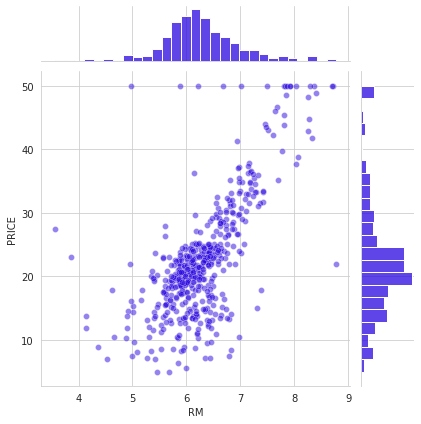

In [23]:
with sns.axes_style("whitegrid"):
  sns.jointplot(data=data,
                x="RM",
                y="PRICE",
                color="#2a06e0",
                joint_kws={"alpha":0.5})

Once again we can see the top property prices all lined up at the top of the chart at $50,000, we may speculate that there was maximum imposed on price during data collection.

# Split Training & Test Dataset

We *can't* use all 506 entries in our dataset to train our model. The reason is that we want to evaluate our model on data that it hasn't seen yet (i.e. out-of-sample data). That way we can get a better idea of its performance in the real world. 

We will have to:

* Import the [`train_test_split()` function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn
* Create 4 subsets: X_train, X_test, y_train, y_test
* Split the training and testing data roughly 80/20. 
* To get the same random split every time we run the notebook we'll use `random_state=10`. This helps us get the same results every time and avoid confusion.

In [24]:
target = data["PRICE"]
features = data.drop("PRICE", axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=10)

In [58]:
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%.


# Multivariable Regression

Our Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Running First Regression


We will utilise sklearn to run the regression on the training dataset, we can also calculate how high the r-squared for the regression is on the training data.

In [57]:
regr = LinearRegression()
regr.fit(X_train, y_train)
r_squared = regr.score(X_train, y_train)

print(f"The r squared value for the training data is: {r_squared:.2}")

The r squared value for the training data is: 0.75


0.75 is quite a high value for r-squared, the higher this value the better our model can explain the variance in price.

### Evaluate the Coefficients of the Model

Here we can do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

* We have already seen that `RM` on its own had a positive relation to `PRICE` based on the scatter plot. Which may lead us to believe that RM's coefficient would also be positive.
* What is the sign on the `LSAT` coefficient? Does it match our intuition and the scatter plot above?
* We can check the other coefficients to see if they have the expected sign
* We can also find out according to the model, what is the premium you would have to pay for an extra room

We can load the coefficients in dataframe to see them more clearly.

In [26]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=["Coefficient"])
regr_coef

,Coefficient
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


As expected the `RM` coefficient has a positive sign due to its positive relationship with `PRICE`. `LSTAT` on the other hand has a negative sign due to its negative impact on `PRICE`. The `CRIM` coefficient has one of the more suprising values, we may have expected a larger negative value for this coefficient. But according to our model the per capita crime rate by town does not seem to adversely effect `PRICE` as much as other factors such as `PRATIO`, `NOX` and `DIS`.

In [27]:
premium = regr_coef.loc["RM"].values[0] * 1000
print(f"The price premium for having an extra room is ${premium:.5}")

The price premium for having an extra room is $3108.5


### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`. 




In [28]:
predicted_vals = regr.predict(X_train)
residuals = y_train - predicted_vals

We can plot the actual values (`y_train`) against the predicted value values: 

The cyan line in the middle shows `y_train` against `y_train`. If the predictions had been 100% accurate then all the dots would be on this line. The further away the dots are from the line, the worse the prediction was. That makes the distance to the cyan line, our residuals.

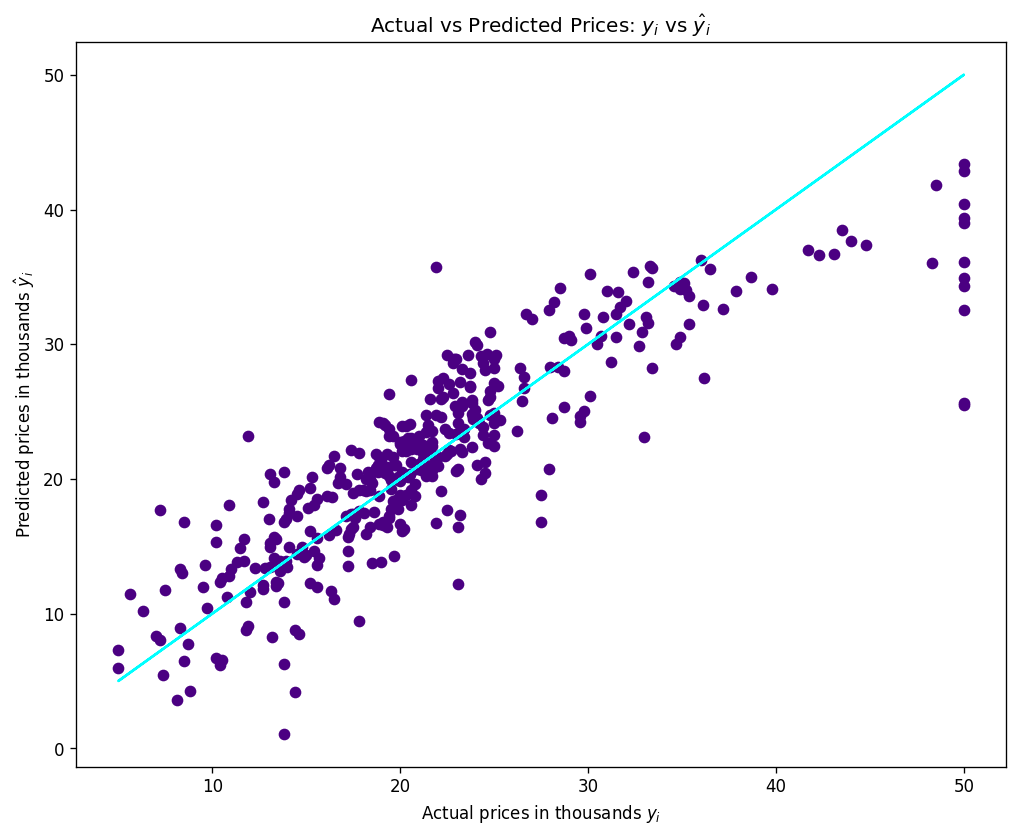

In [29]:
plt.figure(figsize=(10,8), dpi=120)
plt.scatter(x=y_train, y=predicted_vals, c="indigo")
plt.plot(y_train, y_train, c="cyan")
plt.title("Actual vs Predicted Prices: $y _i$ vs $\hat y_i$")
plt.xlabel("Actual prices in thousands $y_i$")
plt.ylabel("Predicted prices in thousands $\hat y_i$");

The second plot will be the residuals against the predicted prices. 

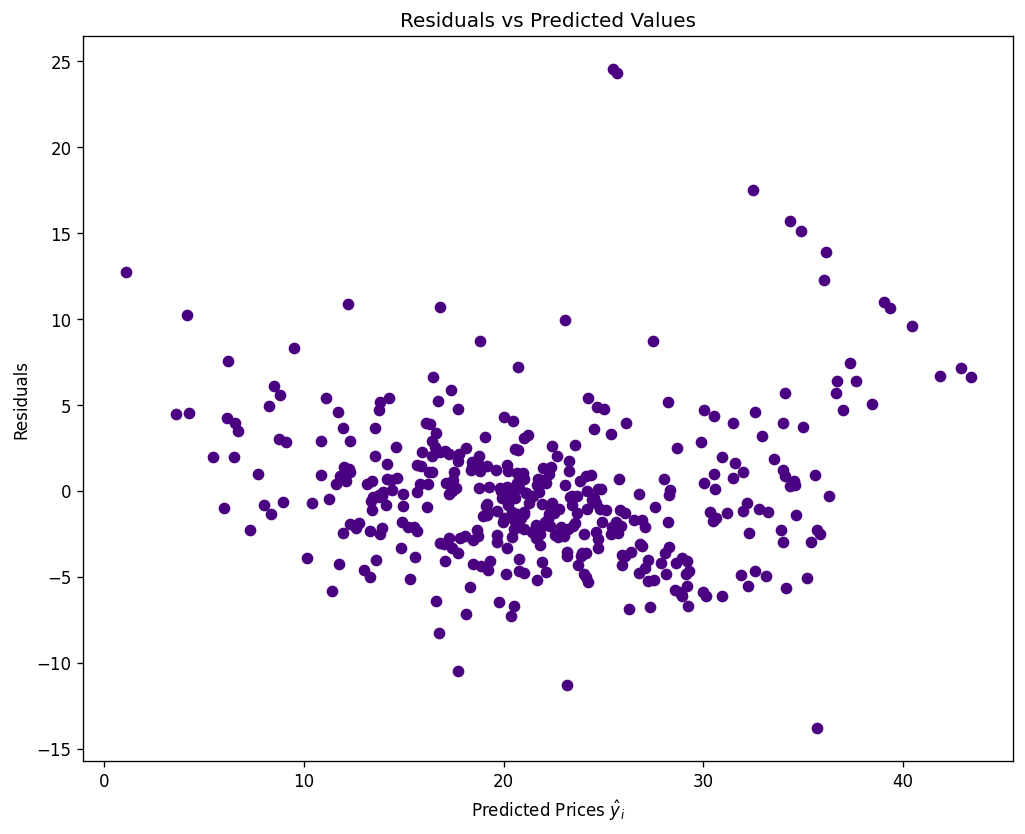

In [30]:
plt.figure(figsize=(10,8), dpi=120)

plt.scatter(x=predicted_vals, 
            y=residuals,
            c="indigo")
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Prices $\hat y_i$")
plt.ylabel("Residuals");

Why do we want to look at the residuals? We want to check that they look random. Why? The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.

In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side. Here's what a normal distribution looks like: 

<img src=https://i.imgur.com/7QBqDtO.png height=400>

Therefore, we will:

* Calculate the mean and the skewness of the residuals. 
* Use Seaborn's `.displot()` to create a histogram and superimpose the Kernel Density Estimate (KDE)
* Find the value of the skewness and if is different from zero? If so, by how much? 
* Calculate the the mean and if it is different from zero?

In [31]:
res_mean = round(residuals.mean(), 2)

res_skew = round(residuals.skew(), 2)

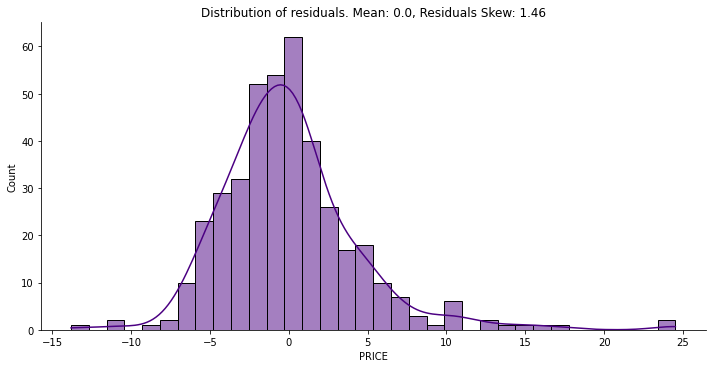

In [32]:
sns.displot(residuals, 
            kde=True,
            aspect=2,
            color="indigo")

plt.title(f"Distribution of residuals. Mean: {res_mean}, Residuals Skew: {res_skew}");

### Data Transformations for a Better Fit

We have two options at this point: 

1. Change our model entirely. Perhaps a linear model is not appropriate. 
2. Transform our data to make it fit better with our linear model. 

Let's try a data transformation approach. 

We can investigate if the target `data['PRICE']` could be a suitable candidate for a log transformation. To do this we will need to:

* Use Seaborn's `.displot()` to show a histogram and KDE of the price data. 
* Calculate the skew of that distribution.
* Use [NumPy's `log()` function](https://numpy.org/doc/stable/reference/generated/numpy.log.html) to create a Series that has the log prices
* Plot the log prices using Seaborn's `.displot()` and calculate the skew. 
* Figure out which distribution has a skew that's closer to zero


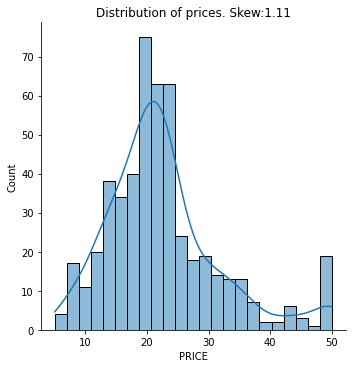

In [59]:
price_skew = round(data.PRICE.skew(), 2)

sns.displot(data.PRICE,
            kde=True)

plt.title(f"Distribution of prices. Skew:{price_skew}");

In [34]:
log_prices = np.log(data["PRICE"])

Text(0.5, 1.0, 'Distribution of log prices. Skew: -0.33')

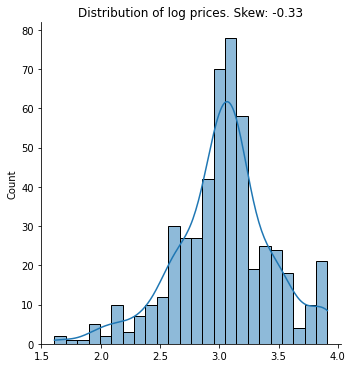

In [61]:
log_price_skew = log_prices.skew()

sns.displot(log_prices.values,
            kde=True)

plt.title(f"Distribution of log prices. Skew: {log_price_skew:.2}")

We can see that the log prices have a skew that's closer to zero which makes them a good candidate for our linear model. Using log values may help to improve our model's residuals and r-squared value.

#### How does the log transformation work?

Using a log transformation does not affect every price equally. Large prices are affected more than smaller prices in the dataset. Here's how the prices are "compressed" by the log transformation:

<img src=https://i.imgur.com/TH8sK1Q.png height=200>

We can see this when we plot the actual prices against the (transformed) log prices. 

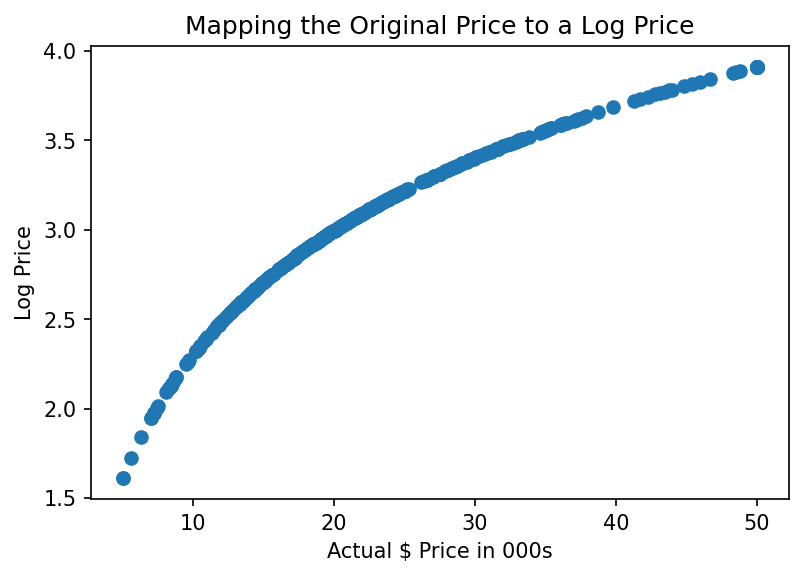

In [36]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$



* We can use `train_test_split()` with the same random state as before to make the results comparable. 

We will now: 

* Run a second regression, but this time using the transformed target data. 
* Calculate the r-squared of the regression on the training data
* Evaluate if we have improved the fit of our model compared to before based on this measure

In [37]:
new_target = np.log(data["PRICE"])
features = data.drop("PRICE", axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features,
                                                    new_target,
                                                    test_size=0.2,
                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f"Training data r-squared: {log_rsquared:.2}")


Training data r-squared: 0.79


This time we managed to get an improvement in the r squared value from 0.75 to 0.79.

## Evaluating Coefficients with Log Prices

Again we will check all the coefficients of the new regression model. 

* Do the coefficients still have the expected sign? 
* Is being next to the river a positive based on the data?
* How does the quality of the schools affect property prices? What happens to prices as there are more students per teacher? 

In [38]:
df_coef = pd.DataFrame(data=log_regr.coef_, index=X_train.columns, columns=["coef"])
df_coef

,coef
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


`CHAS` has a greater value than 0 therefore according to our model properties closer to the river have a greater value. The number of rooms `RM` also has a positive coefficient, as expected more rooms lead to a greater price. A smaller classroom size is indicative of a higher quality education so it's no suprise `PTRATIO` is negative. Additionally, our model predicts that higher nitric oxide levels have the most adverse effect on property value, as `NOX` has the largest negative coefficient.

## Regression with Log Prices & Residual Plots


We can compare the regression outcomes with the log prices side by side by using `indigo` as the colour for the original regression and `navy` for the color using log prices.

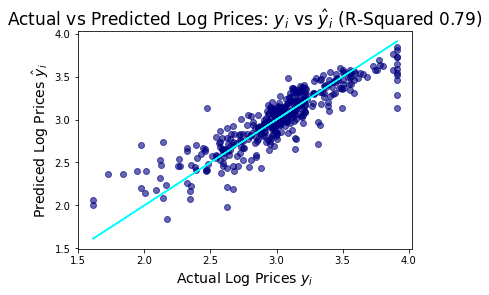

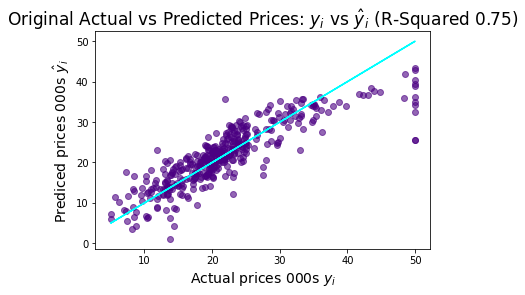

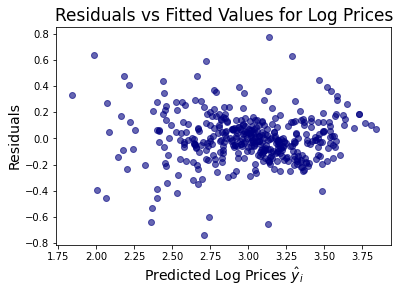

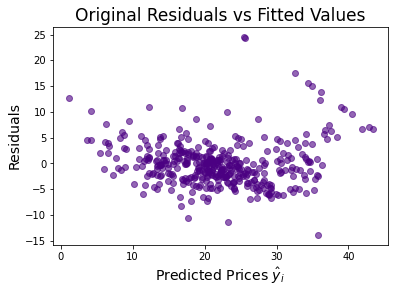

In [39]:
# Graph of Actual vs. Predicted Log Prices
plt.scatter(x=log_y_train, y=log_predictions, c='navy', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Prediced Log Prices $\hat y _i$', fontsize=14)
plt.show()

# Original Regression of Actual vs. Predicted Prices
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Original Actual vs Predicted Prices: $y _i$ vs $\hat y_i$ (R-Squared {r_squared:.3})', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values (Log prices)
plt.scatter(x=log_predictions, y=log_residuals, c='navy', alpha=0.6)
plt.title('Residuals vs Fitted Values for Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()



By eye it is difficult to see if we have made any improvements to our model, we can try another approach.

We can calculate the mean and the skew for the residuals using log prices and find out if the mean and skew are closer to 0 for the regression using log prices.

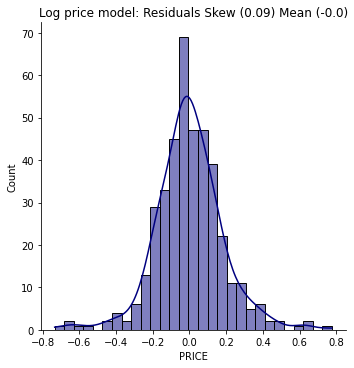

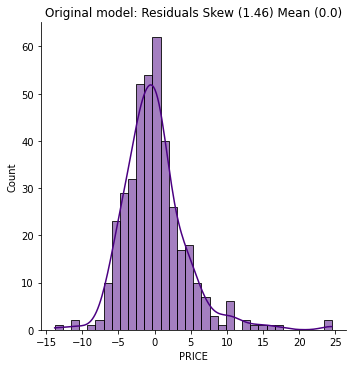

In [40]:
# Distribution of Residuals (log prices) - checking for normality
log_resid_mean = round(log_residuals.mean(), 2)
log_resid_skew = round(log_residuals.skew(), 2)

sns.displot(log_residuals, kde=True, color='navy')
plt.title(f'Log price model: Residuals Skew ({log_resid_skew}) Mean ({log_resid_mean})')
plt.show()

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Original model: Residuals Skew ({res_skew}) Mean ({res_mean})')
plt.show()

The new regression residuals have a skew of 0.09 compared to the original which has a skew 1.46, both mean values are 0, the r squared value also improved. Overall our data transformation seems to have improved our model.

# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in. 

We can compare the r-squared of the two models on the test dataset and compare which model does better.

In [41]:
print(f'Original Model Test Data r-squared: {regr.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {log_regr.score(X_test, log_y_test):.2}')

Original Model Test Data r-squared: 0.67
Log Model Test Data r-squared: 0.74


By definition the model has not been optimised for the testing data, therefore the performance will be lower than on the training data. But our r squared value for the log model test data still remains relatively high. 

# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [63]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


**Making Predictions**

We can use our model to predict how much the average property is worth using the stats above. We can find both what the log price estimate is and what the dollar estimate is.

In [64]:
# Make prediction
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
# or use
dollar_est = np.exp(log_estimate) * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.03
The property is estimated to be worth $20703.2


We can also define our own property charateristics and make a prediction based on these while keeping the average values for CRIM, RAD, INDUS and others.

In [65]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20 
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [66]:
# Set Property Characteristics
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town

if next_to_river:
    property_stats['CHAS'] = 1
else:
    property_stats['CHAS'] = 0

property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [67]:
# Make prediction
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.25
The property is estimated to be worth $25792.0


In [68]:
# Define Property Characteristics
next_to_river = False
nr_rooms = 8
students_per_classroom = 10
distance_to_town = 2
pollution = data.NOX.quantile(q=0.1) # low
amount_of_poverty =  data.LSTAT.quantile(q=0.10) # low

In [69]:
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town

if next_to_river:
    property_stats['CHAS'] = 1
else:
    property_stats['CHAS'] = 0

property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [70]:
# Make prediction
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.87
The property is estimated to be worth $47968.2
